# Figure 2: Map colored by surface mass load

### 1. Load packages

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# file containing functions:
import loadquakes
importlib.reload(loadquakes)

ERROR 1: PROJ: proj_create_from_database: Open of /home/amand4/anaconda3/envs/syamsul_2023/share/proj failed


<module 'loadquakes' from '/home/amand4/notebooks/SLIM/loadquakes.py'>

### 2. Load datasets

In [2]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv')
NND_declustered_v2 = pd.read_csv('NND_declustered_v2.csv')

### 3. Plot the SLIQs from the full catalog with highest CP

In [3]:
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

<AxesSubplot:title={'center':'SLIQs with highest conditional probability (full catalog)'}, xlabel='Longitude', ylabel='Latitude'>

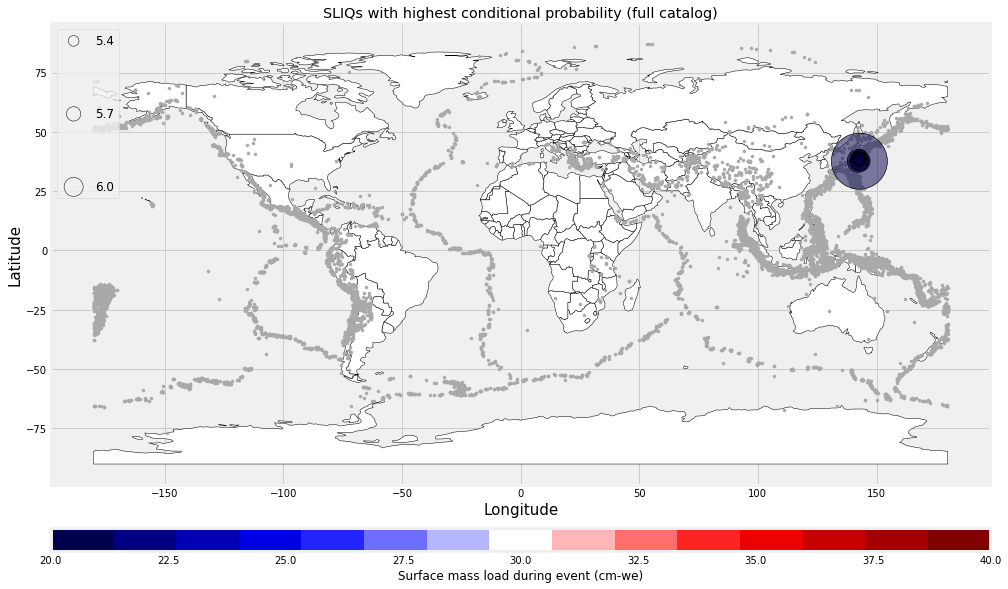

In [4]:
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

loadquakes.load_map_cb(catalog,sliq_full.head(10),sliq_full.dmass.head(10), [1,8,6],
                'SLIQs with highest conditional probability (full catalog)',20,40,11,circle_scale=1e-6)

### 4. Plot the SLIQs from the NND declustered catalog with highest CP

In [5]:
sliq_nnd=NND_declustered.sort_values('cp',ascending=False)
sliq_nnd=sliq_nnd.reset_index()
sliq_nnd=sliq_nnd.drop(['index'], axis=1)


sliq_nnd['dmass']=sliq_nnd['dmass'].astype(float)

<AxesSubplot:title={'center':'SLIQs with highest conditional probability (NND)'}, xlabel='Longitude', ylabel='Latitude'>

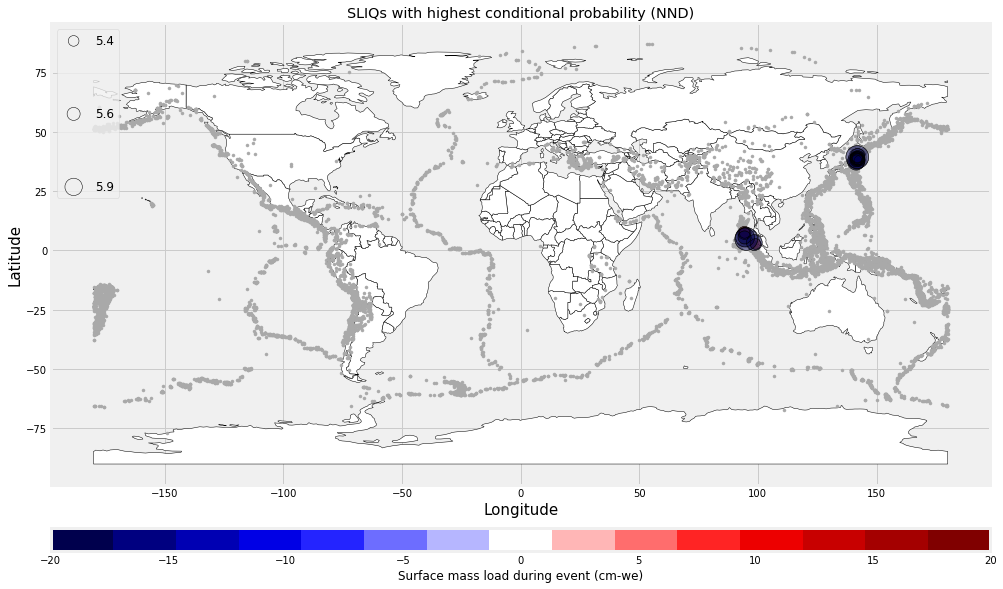

In [6]:
loadquakes.load_map_cb(catalog,sliq_nnd.head(20),sliq_nnd.dmass.head(20), [3,9,1],
                'SLIQs with highest conditional probability (NND)',-20,20,11,circle_scale=1e-6)

In [7]:
sliq_nnd_v2=NND_declustered_v2.sort_values('cp',ascending=False)
sliq_nnd_v2=sliq_nnd_v2.reset_index()
sliq_nnd_v2=sliq_nnd_v2.drop(['index'], axis=1)


sliq_nnd_v2['dmass']=sliq_nnd_v2['dmass'].astype(float)

In [8]:
sliq_nnd_v2.head(20)

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
0,2676,2678,2.7455,98.9789,2017-07-11 01:24:32.110,5.4,POINT (2.7455 98.9789),5.4,0.0,6.907373e-11,0.998735,0.001265,1.0,146.54,76.055861,10.965762
1,2888,2890,3.3168,98.4696,2017-01-16 12:42:10.680,5.6,POINT (3.3168 98.4696),5.4,0.0,6.907373e-11,0.984950,0.015050,1.0,6.00,73.217842,9.850400
2,2862,2864,5.2964,96.0660,2017-02-15 19:47:07.380,5.4,POINT (5.2964 96.066),5.4,0.0,6.907373e-11,0.999900,0.000100,1.0,13.00,72.587439,8.906364
3,3904,3906,1.5404,97.9026,2015-05-08 03:12:21.520,5.7,POINT (1.5404 97.90260000000001),5.4,0.0,6.907373e-11,0.998729,0.001271,1.0,36.00,64.000341,7.372014
4,3315,3317,28.4538,87.5326,2016-05-22 01:48:48.130,5.4,POINT (28.4538 87.5326),5.4,0.0,6.907373e-11,0.998462,0.001538,1.0,9.36,-49.251705,6.730266
5,3805,3807,40.3631,141.4646,2015-07-09 18:32:51.220,5.5,POINT (40.3631 141.4646),5.4,0.0,6.907373e-11,0.998705,0.001295,1.0,81.00,-49.318788,6.730266
6,1663,1665,7.4194,94.4056,2019-04-13 16:12:55.522,5.4,POINT (7.4194 94.40560000000001),5.4,0.0,6.907373e-11,0.999953,0.000047,1.0,10.00,67.108714,5.800929
7,3595,3597,6.4078,94.8019,2015-11-09 08:12:46.020,5.5,POINT (6.4078 94.8019),5.4,0.0,6.907373e-11,0.999970,0.000030,1.0,10.00,52.775534,5.680935
8,4811,4813,5.1033,95.9709,2013-10-22 05:40:39.100,5.4,POINT (5.1033 95.9709),5.4,0.0,6.907373e-11,0.999383,0.000617,1.0,9.75,52.836631,5.680935
9,4475,4477,1.8734,97.8773,2014-05-03 14:47:04.760,5.4,POINT (1.8734 97.87730000000001),5.4,0.0,6.907373e-11,0.999989,0.000011,1.0,43.42,61.446229,4.682073


<AxesSubplot:title={'center':'SLIQs with highest conditional probability (NND)'}, xlabel='Longitude', ylabel='Latitude'>

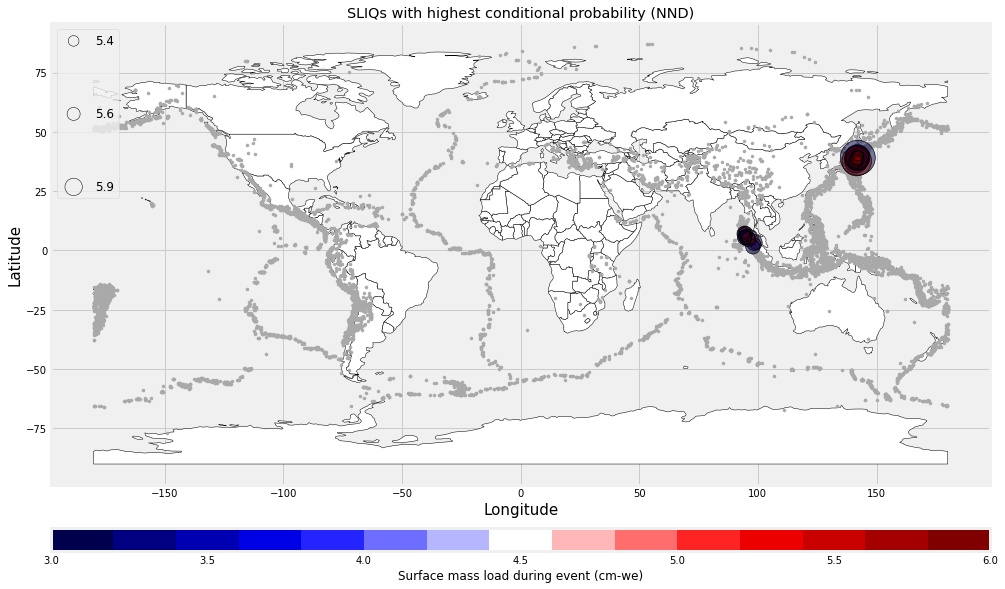

In [9]:
loadquakes.load_map_cb(catalog,sliq_nnd.head(30),sliq_nnd.dmass.head(30), [3,9,1],
                'SLIQs with highest conditional probability (NND)',3,6,11,circle_scale=1e-6)

### 5. Plot the SLIQs from the ETAS declustered catalog with highest CP

In [10]:
sliq_etas=etas_declustered.sort_values('cp',ascending=False)
sliq_etas=sliq_etas.reset_index()
sliq_etas=sliq_etas.drop(['index'], axis=1)

sliq_etas['dmass']=sliq_etas['dmass'].astype(float)

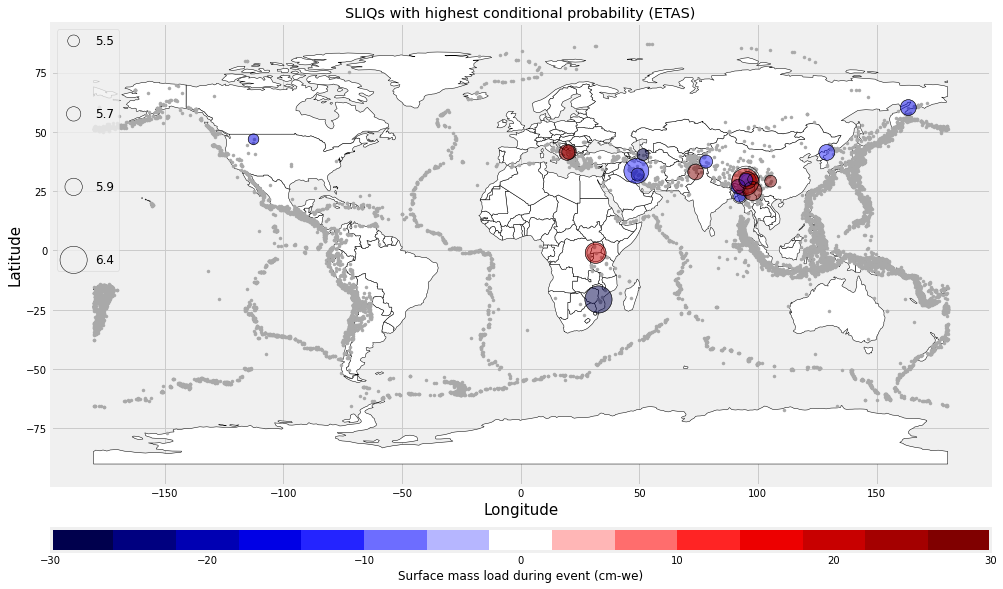

In [23]:
ax=loadquakes.load_map_cb(catalog,sliq_etas.head(20),sliq_etas.dmass.head(20), [1,2,3,5],
                'SLIQs with highest conditional probability (ETAS)',-30,30,11,circle_scale=1e-6)

(15.0, 35.0)

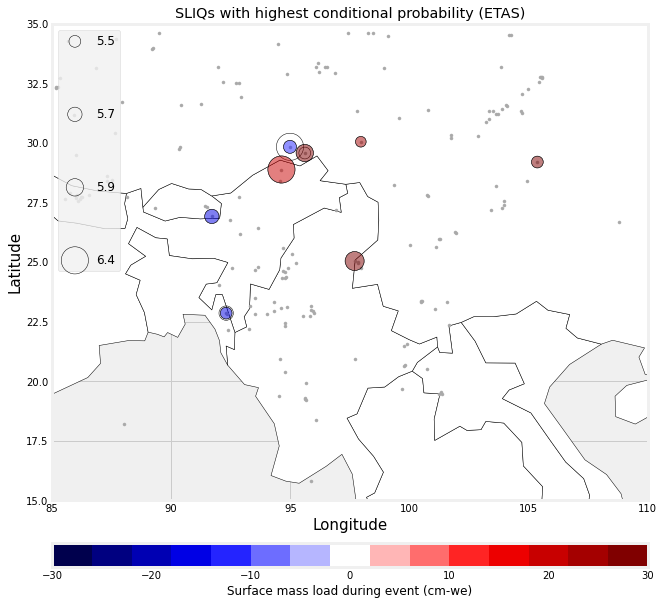

In [12]:
ax=loadquakes.load_map_cb(catalog,sliq_etas.head(20),sliq_etas.dmass.head(20), [1,2,3,5],
                'SLIQs with highest conditional probability (ETAS)',-30,30,11,circle_scale=1e-6)
ax.set_xlim([85,110])
ax.set_ylim([15,35])

In [13]:
sliq_etas.head(20)[(sliq_etas.head(20).latitude>20) & 
          (sliq_etas.head(20).latitude<32) & 
          (sliq_etas.head(20).longitude>90) & 
          (sliq_etas.head(20).longitude<110)]

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
0,10466,10468,28.8810,94.6260,2005-06-01 20:06:41.450,5.8,POINT (28.881 94.626),5.4,0.0,6.907373e-11,0.796710,0.203290,1.0,25.80,31.352074,11.914214
1,11826,11828,29.5730,95.6050,2003-08-18 09:03:03.520,5.5,POINT (29.573 95.605),5.4,0.0,6.907373e-11,0.585476,0.414524,1.0,33.00,31.846877,11.914214
2,11862,11864,22.8540,92.3060,2003-07-26 23:18:17.960,5.7,POINT (22.854 92.306),5.4,0.0,6.907373e-11,0.891394,0.108606,1.0,10.00,31.683223,11.914214
5,2487,2489,29.8333,94.9838,2017-11-17 22:34:19.450,6.4,POINT (29.8333 94.9838),5.4,0.0,6.907373e-11,0.784964,0.215036,1.0,8.00,-34.524164,3.926561
8,209,211,29.1944,105.3650,2021-09-15 20:33:31.851,5.4,POINT (29.1944 105.365),5.4,0.0,6.907373e-11,0.890814,0.109186,1.0,7.12,24.034846,3.285261
10,10066,10068,26.9120,91.7050,2006-02-23 20:04:53.550,5.8,POINT (26.912 91.705),5.4,0.0,6.907373e-11,0.663857,0.336143,1.0,10.00,-15.574905,2.832101
11,4916,4918,30.0464,97.9565,2013-08-11 21:23:41.310,5.7,POINT (30.0464 97.95650000000001),5.4,0.0,6.907373e-11,0.832776,0.167224,1.0,6.00,-15.338487,2.832101
15,8332,8334,25.0390,97.6970,2008-08-21 12:24:30.930,6.0,POINT (25.039 97.697),5.4,0.0,6.907373e-11,0.853446,0.146554,1.0,10.00,27.661882,2.406558


In [14]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [20]:
np.round_(sliq_etas.head(20).magnitude,1).loc[1]

5.5

In [22]:
sliq_etas.head(20)

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
0,10466,10468,28.8810,94.6260,2005-06-01 20:06:41.450,5.8,POINT (28.881 94.626),5.4,0.0,6.907373e-11,0.796710,0.203290,1.0,25.80,31.352074,11.914214
1,11826,11828,29.5730,95.6050,2003-08-18 09:03:03.520,5.5,POINT (29.573 95.605),5.4,0.0,6.907373e-11,0.585476,0.414524,1.0,33.00,31.846877,11.914214
2,11862,11864,22.8540,92.3060,2003-07-26 23:18:17.960,5.7,POINT (22.854 92.306),5.4,0.0,6.907373e-11,0.891394,0.108606,1.0,10.00,31.683223,11.914214
3,3125,3127,-1.0355,31.6181,2016-09-10 12:27:33.410,5.9,POINT (-1.0355 31.6181),5.4,0.0,6.907373e-11,0.470086,0.529914,1.0,40.00,45.987494,9.359505
4,4410,4412,40.3731,51.5739,2014-06-07 06:05:29.910,5.5,POINT (40.3731 51.5739),5.4,0.0,6.907373e-11,0.792073,0.207927,1.0,30.51,-43.055702,7.904443
5,2487,2489,29.8333,94.9838,2017-11-17 22:34:19.450,6.4,POINT (29.8333 94.9838),5.4,0.0,6.907373e-11,0.784964,0.215036,1.0,8.00,-34.524164,3.926561
6,1412,1414,41.3375,19.5303,2019-09-21 14:04:25.803,5.6,POINT (41.3375 19.5303),5.4,0.0,6.907373e-11,0.854188,0.145812,1.0,20.00,-31.479464,3.372833
7,5133,5135,60.2330,163.4000,2013-03-13 03:12:52.180,5.8,POINT (60.233 163.4),5.4,0.0,6.907373e-11,0.890949,0.109051,1.0,5.00,24.376594,3.285261
8,209,211,29.1944,105.3650,2021-09-15 20:33:31.851,5.4,POINT (29.1944 105.365),5.4,0.0,6.907373e-11,0.890814,0.109186,1.0,7.12,24.034846,3.285261
9,7697,7699,41.4830,20.3880,2009-09-06 21:49:42.170,5.5,POINT (41.483 20.388),5.4,0.0,6.907373e-11,0.882697,0.117303,1.0,3.00,-16.324715,2.832101
